In [ ]:
import pandas as pd
import numpy as np
import scipy.io as sio
import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
# plt.style.use(['dark_background', 'bmh'])
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)
plt.rc('figure', figsize= (8, 5), dpi=200)

In [10]:
def find_date(df_raw, yy, mon, day):
    for i in range(0,len(df_raw)):
        if df_raw.iloc[i,0].year == yy:
            if df_raw.iloc[i,0].month == mon: 
                if df_raw.iloc[i,0].day == day:
                    X = i
                    break
                else:
                    continue
    return X

In [25]:
df_time = pd.read_csv('./datetime_Z24.txt')
df_time['datetime'] = pd.to_datetime(df_time['datetime'])

mat_fname = './Final_MI_Results_Z24.mat'
mat_contents = sio.loadmat(mat_fname)

df_f = pd.DataFrame(mat_contents['f'])
df_f.columns = ['f1', 'f2', 'f3', 'f4']
df_f['Temp'] = pd.DataFrame(mat_contents['Z24_TP'])

df_input = pd.concat([df_time, df_f], axis = 1)

In [30]:
# damage_date = find_date(df_input, 1998, 8, 9)
damage_date = find_date(df_input, 1998, 8, 7)

# df_raw_tt 행렬의 행 개수를 확인하여 행렬 생성
num_rows = df_input.shape[0]
df_input['label'] = np.zeros((num_rows, 1))
df_input.loc[damage_date:, 'label'] = 1

df_input

,datetime,f1,f2,f3,f4,Temp,label
0,1997-11-11 14:00:00,3.987027,5.194140,10.017850,10.812540,7.465,0.0
1,1997-11-11 15:00:00,4.050453,5.156154,10.214089,10.806404,7.795,0.0
2,1997-11-11 16:00:00,3.991237,5.166507,10.347106,10.839854,8.130,0.0
3,1997-11-11 17:00:00,3.990014,5.152177,10.217715,10.840735,8.290,0.0
4,1997-11-11 19:00:00,4.005077,5.177117,10.029935,10.771591,7.890,0.0
...,...,...,...,...,...,...,...
3927,1998-09-11 08:00:00,3.824709,4.722723,9.717825,10.322502,21.155,1.0
3928,1998-09-11 09:00:00,3.832897,4.707808,9.756794,10.431894,20.985,1.0
3929,1998-09-11 11:00:00,3.851463,4.674012,9.696455,10.198018,20.970,1.0
3930,1998-09-11 12:00:00,3.850907,4.670178,9.689826,10.138756,21.115,1.0


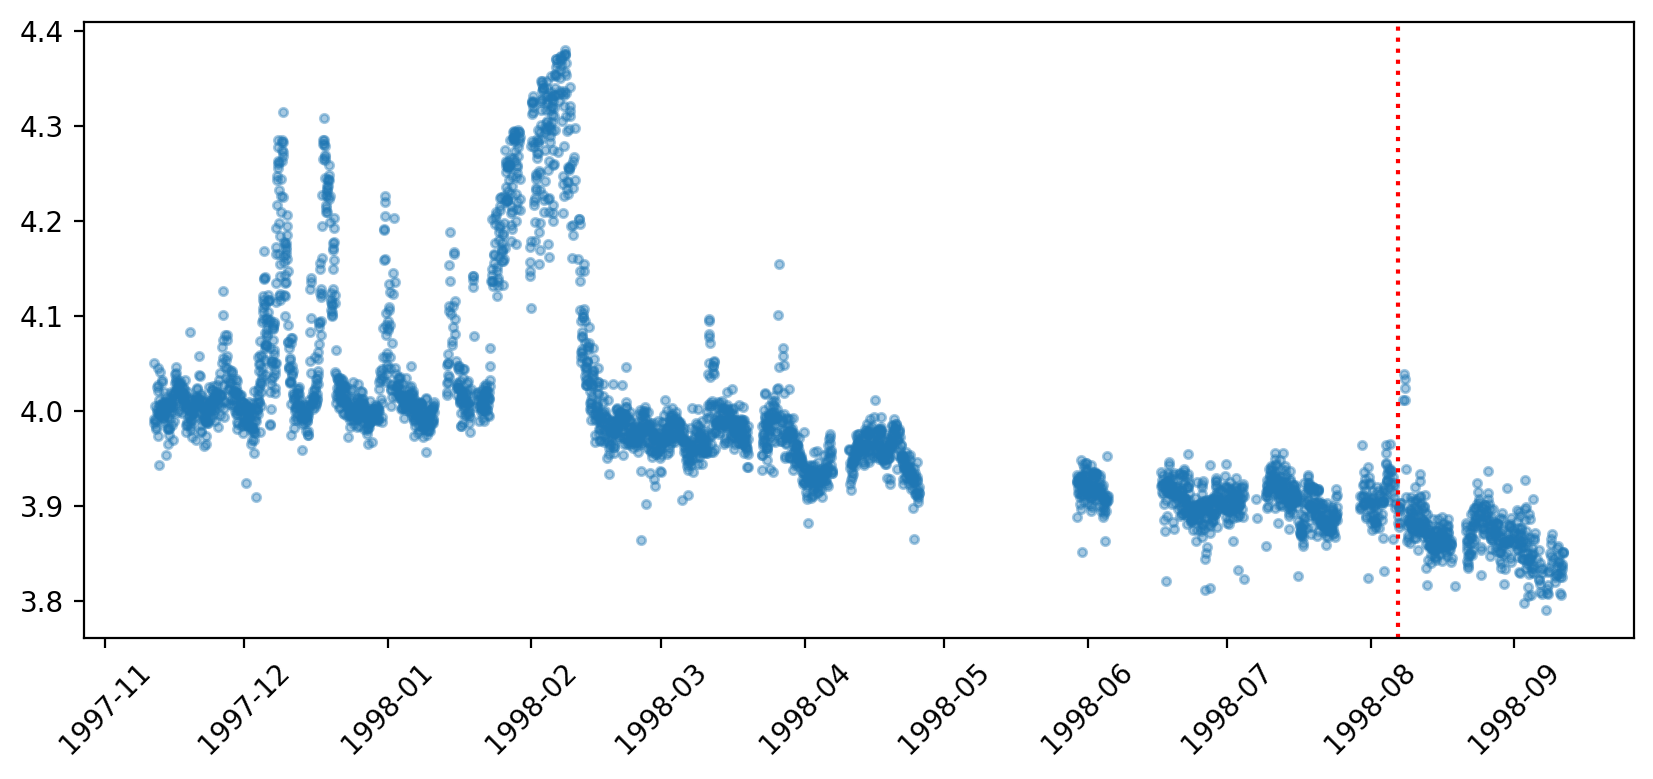

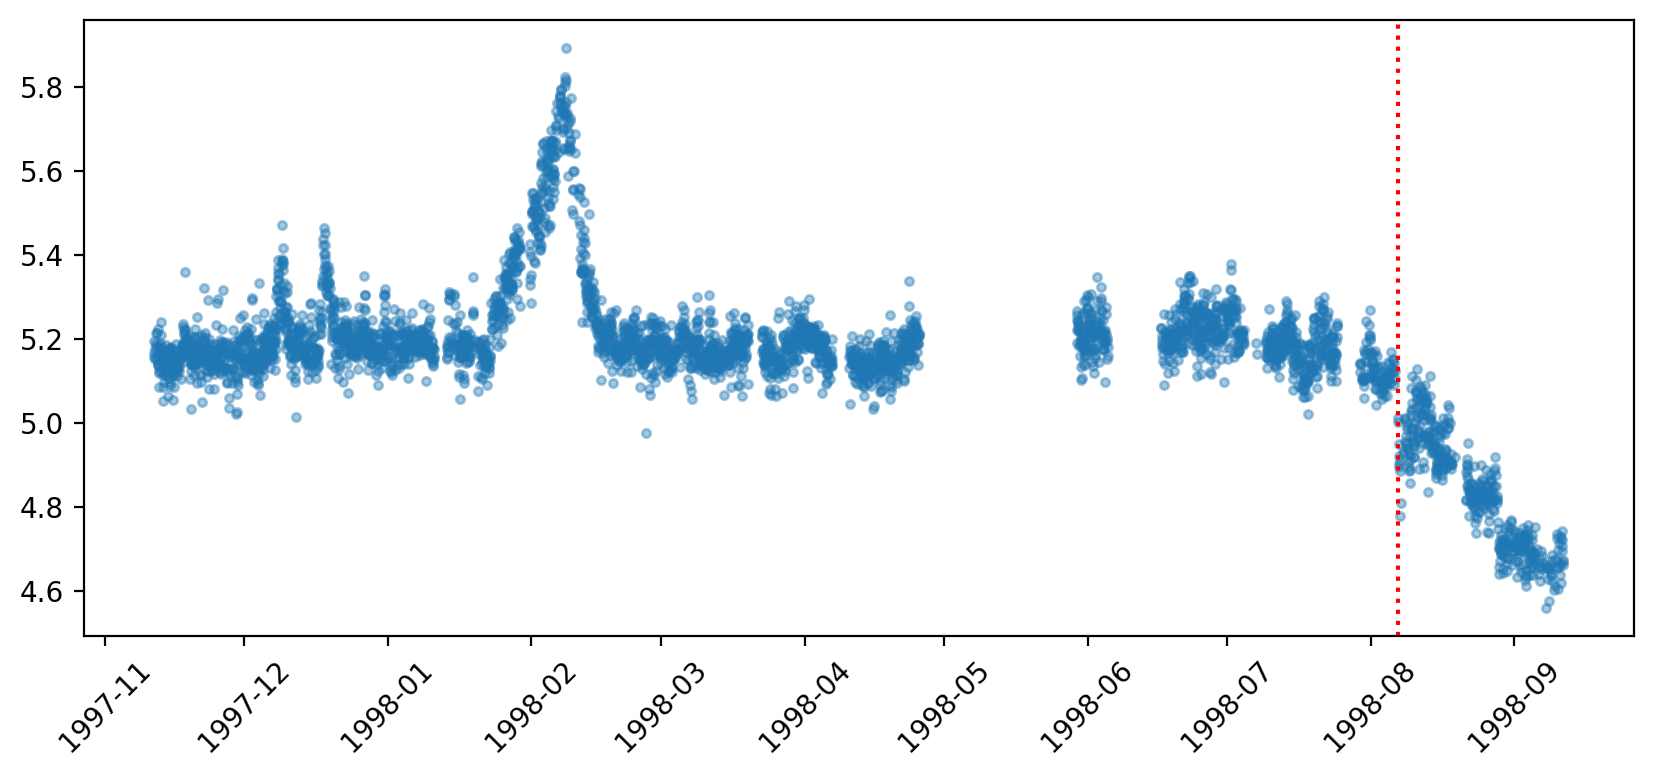

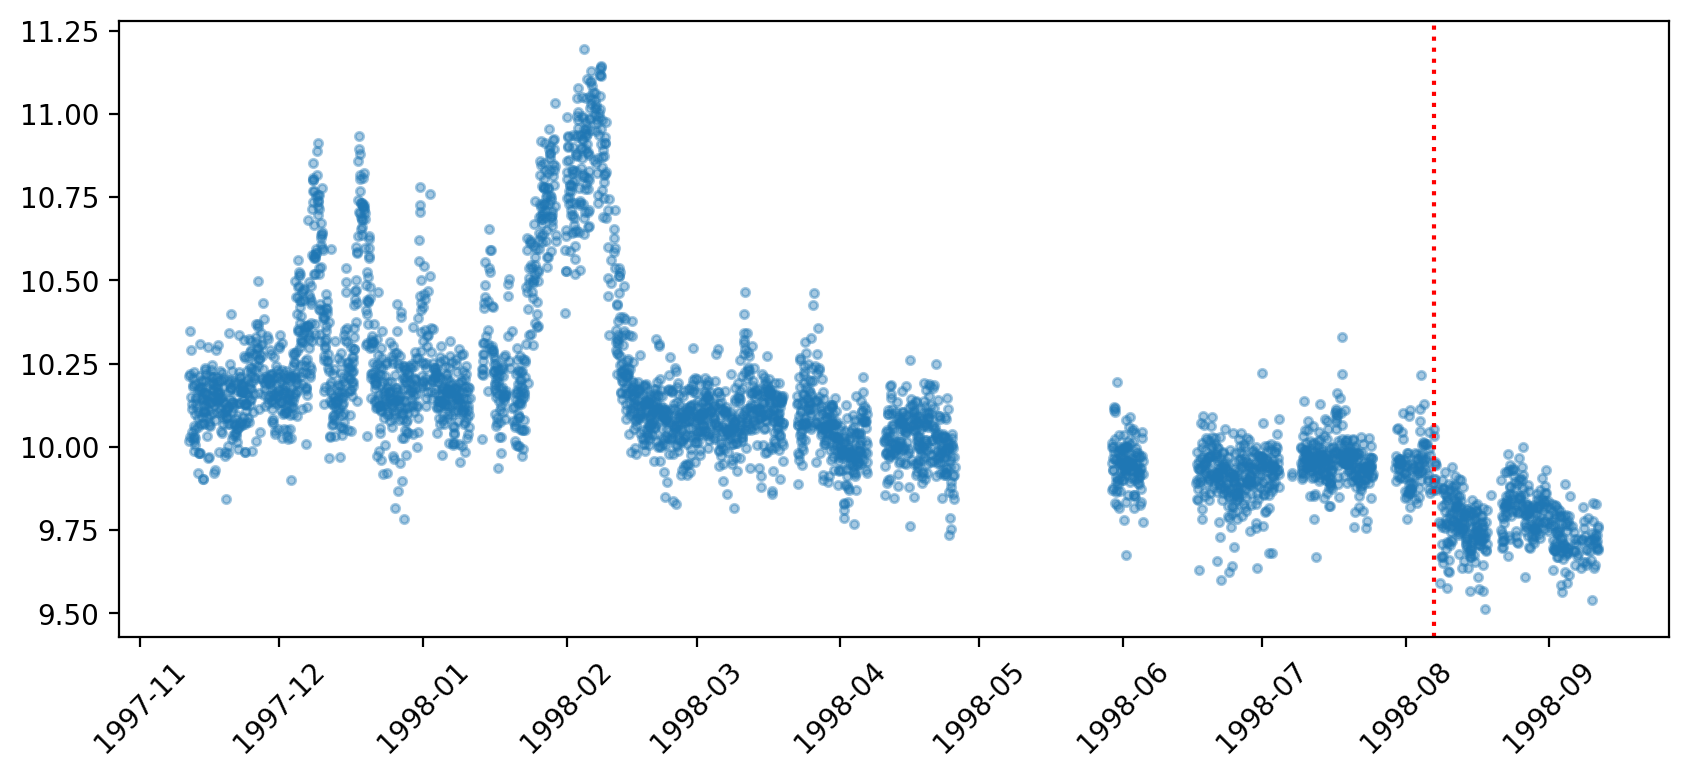

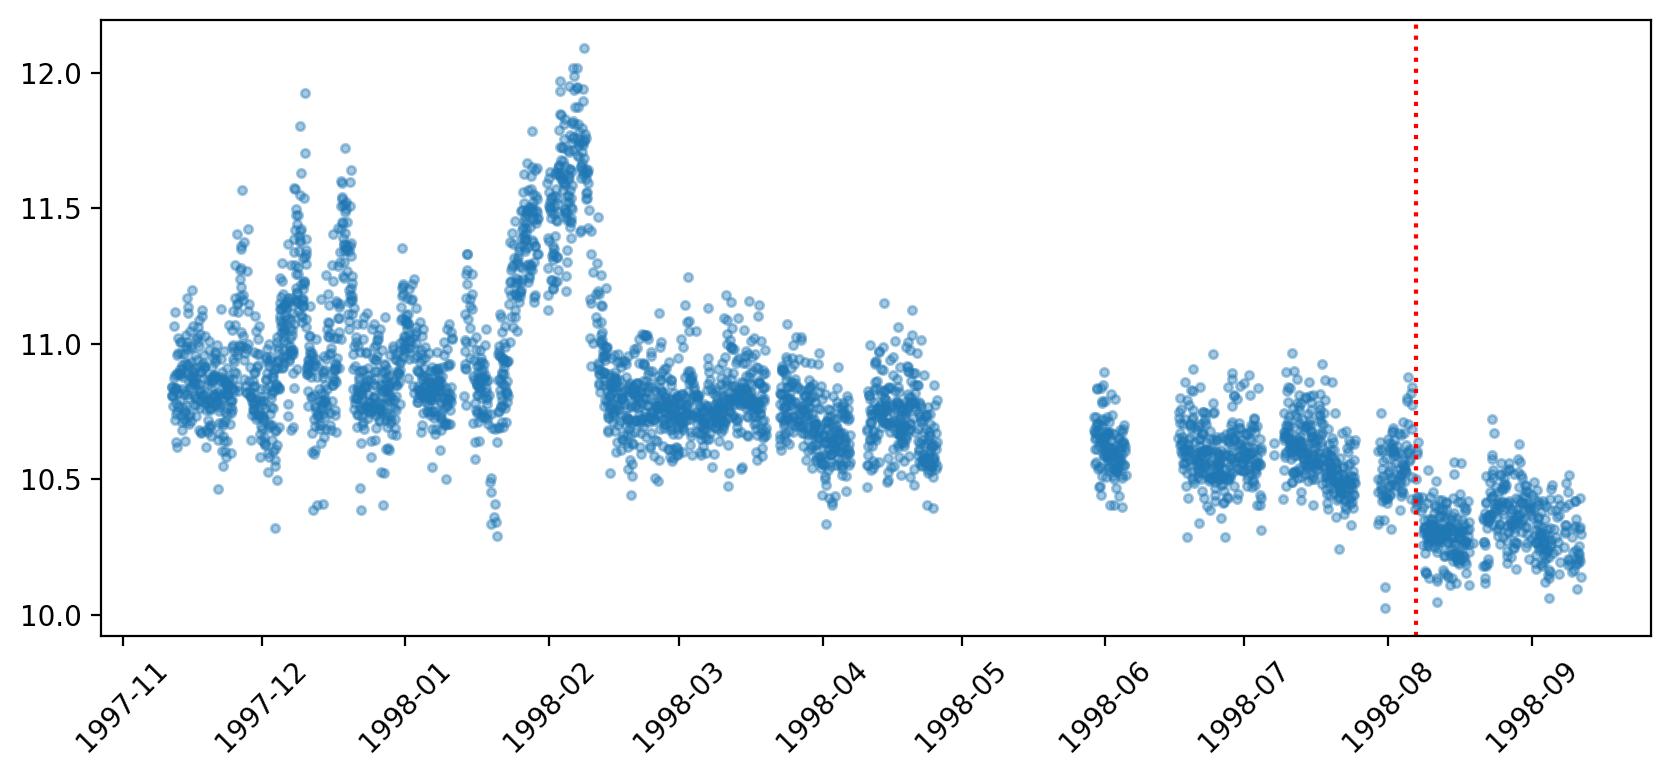

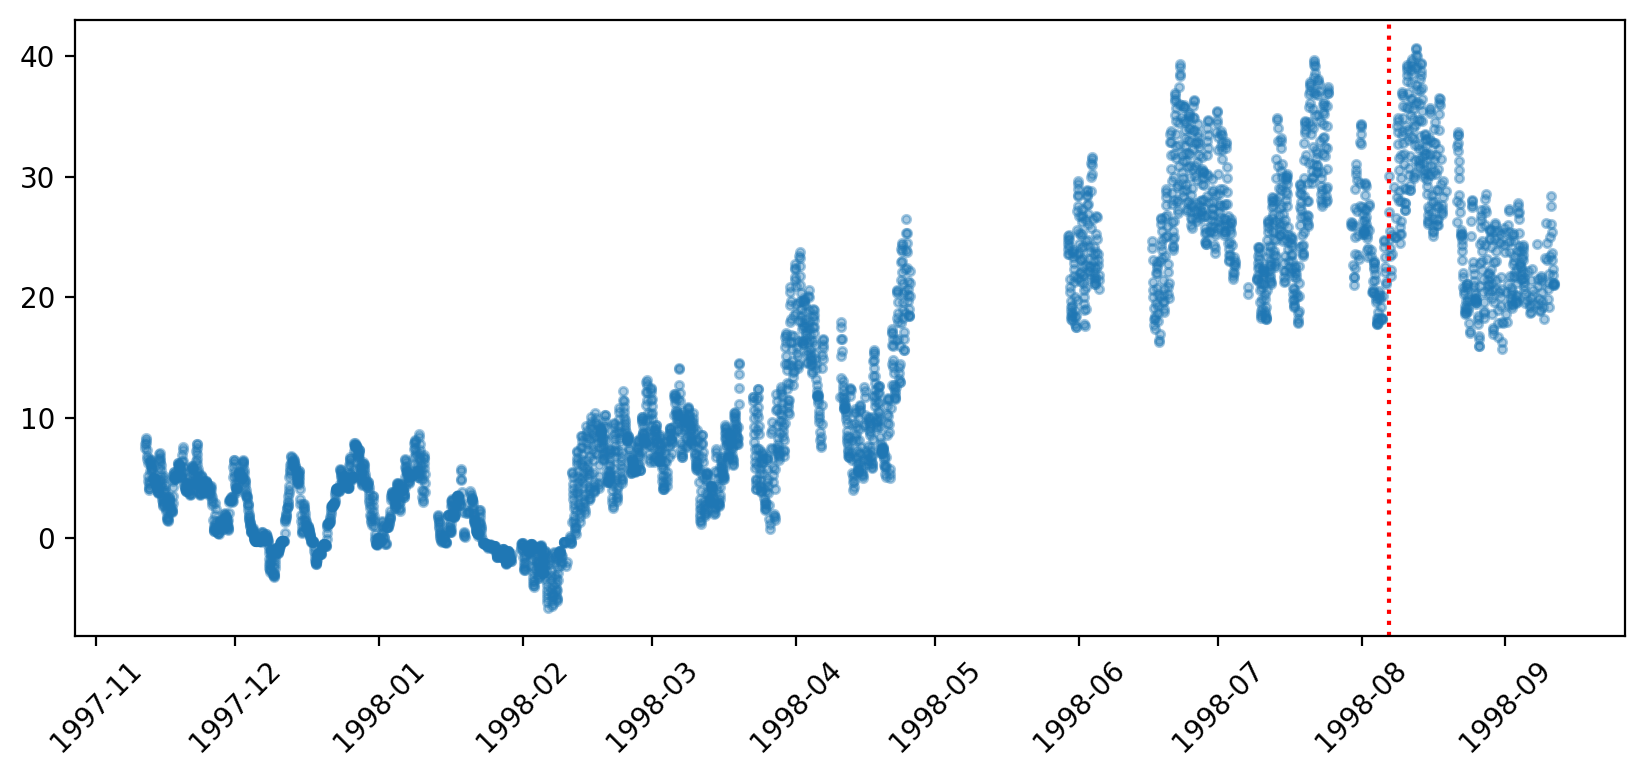

In [ ]:
for col_ in ['f1', 'f2', 'f3', 'f4','Temp']:
    plt.figure(figsize = (10, 4), dpi = 200)
    plt.plot(df_input['datetime'], df_input[col_], '.', alpha = .4)
    plt.axvline(x = df_input['datetime'][damage_date], color = 'r', linestyle = ':')
    plt.xticks(rotation = 45)
    plt.grid(linestyle = ':', alpha = 0.78)
    # plt.xlim([df_input['datetime'][damage_date-100]], [df_input['datetime'][damage_date+100]])
    plt.show()

In [35]:
df_data = df_input.copy()
df_data.to_csv('./Z24.csv')